<a href="https://colab.research.google.com/github/Jeesoo-Jhun/DS-NTL-091624/blob/main/%5BFIS_DS%5D_TUTORIAL_Modeling_and_Tuning_with_Regression_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
---

# 💠 **TUTORIAL: Hyperparameter Tuning with Regression Algorithms**

In this tutorial, we'll explore how to tune and improve the performance of newly-learned regression functions for two distinctive predictive tasks spanning the realms of true regression analysis and classification.

**NOTE**: This tutorial is designed and recreated from Jason Brownlee's excellent _Machine Learning Mastery_ tutorialized guide on parameter optimization with random search and grid search for regression algorithms.

---
---

For this tutorial, we'll make use of two powerful datasets for regression intentions.

The first is the **[auto-insurance dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv)**: a standard machine learning dataset comprising 63 rows of data with 1 numerical input variable and a numerical target variable.

This first dataset involves predicting the total amount in claims (thousands of Swedish Kronor) given the number of claims for different geographical regions.

The second is the **[sonar dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv)**: a standard machine learning dataset comprising 208 rows of data with 60 numerical input variables and a target variable with two class values (e.g. binary classification).

This second dataset involves predicting whether sonar returns indicate a rock or simulated mine.

---

As always, let's start by getting access to relevant importations and instantiations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.metrics import explained_variance_score, accuracy_score, classification_report, confusion_matrix

Let's begin our process formally by getting access to both of our datasets: the auto-insurance dataset and the sonar dataset.

In [ ]:
PATH_AUTO = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/auto-insurance.csv"
PATH_SONAR = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"

COLUMNS_AUTO = ["number_of_claims", "total_payment_in_thousands_of_kronor"]
COLUMNS_SONAR = [f"sonar_frequency_n0{number}" if number < 10 else f"sonar_frequency_n{number}" for number in range(60)] + ["artifact_type"]

auto, sonar = pd.read_csv(PATH_AUTO, names=COLUMNS_AUTO), pd.read_csv(PATH_SONAR, names=COLUMNS_SONAR)

As good practice, we can take a quick peek at our datasets to explore their features and dimensionalities.

In [ ]:
auto

,number_of_claims,total_payment_in_thousands_of_kronor
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


This dataset is relatively simple and straightforward, comprising of two columns with largely numerical information.

It will serve as a good example of standard regression analysis.

In [ ]:
sonar

,sonar_frequency_n00,sonar_frequency_n01,sonar_frequency_n02,sonar_frequency_n03,sonar_frequency_n04,sonar_frequency_n05,sonar_frequency_n06,sonar_frequency_n07,sonar_frequency_n08,sonar_frequency_n09,...,sonar_frequency_n51,sonar_frequency_n52,sonar_frequency_n53,sonar_frequency_n54,sonar_frequency_n55,sonar_frequency_n56,sonar_frequency_n57,sonar_frequency_n58,sonar_frequency_n59,artifact_type
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


The sonar data appears to comprise a much greater spread of dimensionality and information across a largely numerical domain; however, its primary predictive capacity is via a binary classification column (`60`).

As such, it will be useful for employing a regression algorithm for classification intents.

---

For the sake of simplicity, let's go ahead and jump immediately into processing our data for machine learning analysis.

Let's start with our auto-insurance data to understand regression first.

In [ ]:
X_auto, y_auto = auto["number_of_claims"], auto["total_payment_in_thousands_of_kronor"]

And for predictabilty's sake, we can go ahead and make use of `train_test_split()` to isolate training and testing splits across our data.

In [ ]:
X_auto_train, X_auto_test, y_auto_train, y_auto_test = train_test_split(X_auto,
                                                                        y_auto,
                                                                        train_size=0.8,
                                                                        test_size=0.2,
                                                                        random_state=42)

For the sake of building comprehension, let's employ some quick data visualization to understand how we can use linear regressors against easily veriably linearly related data.

This will probably be a lot _harder_ to do for our sonar data since we're work in a 60-dimensional hyperspace, but our auto-insurance dataset simply comprises two (2) dimensions and thus will be much easier to visualize.

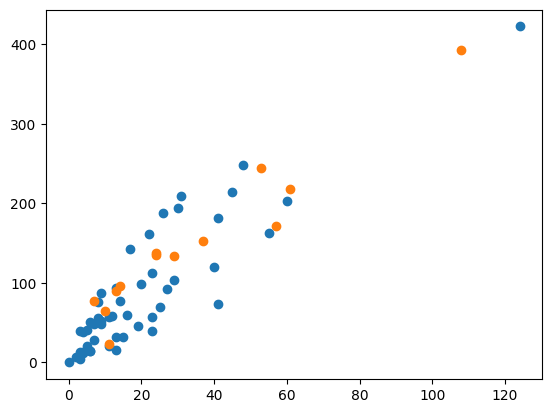

In [ ]:
plt.scatter(X_auto_train, y_auto_train)
plt.scatter(X_auto_test, y_auto_test)

We can see that the data is clearly linearly related, with the occurrences of a few oddball outliers.

Usually it may be worthwhile to impute these; however, they don't actively be seeming to withdraw from our visual linear relationship (as a matter-of-fact, they actually seem to corroborate it).

Thus, we can move immediately to some predictive modeling to see if we're right.

We'll keep things simple by employing a **linear regression** algorithm for prediction.

In [ ]:
model = LinearRegression()

For a basic linear regressor employing **ordinary least square (OLS)**, there actually exist **no major hyperparameters**.

This is notably due to how deterministic and standardized a basic linear regressor is, since it usually doesn't employ additional techniques such as _regularization_ or data weighting.

At the very least, it makes our job easier! (For now...)

---

The main difference in regression compared to classification is the choice of the scoring method.

For regression, performance is often measured using an error, which is minimized, with zero representing a model with perfect skill. The hyperparameter optimization procedures in scikit-learn assume a maximizing score. Therefore a version of each error metric is provided that is made negative.

This means that large positive errors become large negative errors, good performance are small negative values close to zero and perfect skill is zero.

The sign of the negative MAE can be ignored when interpreting the result.

In this case we will mean absolute error (MAE) and a maximizing version of this error is available by setting the “scoring” argument to “neg_mean_absolute_error“.

---

At this point, we can take our model directly and fit it to our training data to obtain a line-of-best-fit that best models our data's relationship.

In [ ]:
model.fit(X_auto_train.values.reshape(-1, 1), y_auto_train.values.reshape(-1, 1))

LinearRegression()

Now that our model is fitted to our training data, we can assess its fitness by allowing it to generate predicted labels from our independent testing data sample.

Keep in mind that it's _imperative_ that the model does **NOT** receive access to the target testing data – this is for us as the developer to use in order to check the model's performant accuracy.

In [ ]:
y_auto_pred = model.predict(X_auto_test.values.reshape(-1, 1)).flatten()

We've generated some predictive labels from our model! Awesome!

These labels on their own though are somewhat meaningless... after all, we have to check if they're right!

Let's calculate the **coefficient of determination** or **R-squared value** – a very powerful statistical measurement of how much _expressed variance_ that our regression model accounts for.

In [ ]:
coefficient_of_determination = 100 * explained_variance_score(y_auto_test,
                                                              y_auto_pred)

print("> REGRESSIVE ACCURACY: \t{:.2f}%".format(coefficient_of_determination))

> REGRESSIVE ACCURACY: 	91.86%


Wow! That's a pretty good accuracy measure to start with.

But we can do better!

Unfortunately, we can't do too much better immediately with our model, since a basic OLS-driven regressor doesn't have easy-to-use hyperparameters.

Fortunately, there exist other linear regressors that _do_ include hyperparameters that we can modify and test, such as the **ridge regressor**.

We'll revisit ridge regularization at a later point, but for now, all that matters to understand is that this is an extended version of OLS-driven linear regression that employs more sophisticated regularization/correction techniques to our line-of-best-fit that we can control for using several key hyperparameters that we'll introduce shortly.

In [ ]:
model = Ridge()

We'll employ K-Folds Cross Validation as a method of producing more reliable predictive results across this task.

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In this case, we'll make use of three key predictive hyperparameters:
- `solver`
- `alpha`
- `fit_intercept`

...as well as their corresponding appropriate value ranges.

For this case, we'll make use of grid searching to check over all permutations of parameters.

In [ ]:
grid = dict()

grid["solver"] = ["svd", "cholesky", "lsqr", "sag"]
grid["alpha"] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
grid["fit_intercept"] = [True, False]

Again, the main difference in regression compared to classification is the choice of the scoring method.

For regression, performance is often measured using an error, which is minimized, with zero representing a model with perfect skill. The hyperparameter optimization procedures in scikit-learn assume a maximizing score. Therefore a version of each error metric is provided that is made negative.

This means that large positive errors become large negative errors, good performance are small negative values close to zero and perfect skill is zero.

The sign of the negative MAE can be ignored when interpreting the result.

In this case we will mean absolute error (MAE) and a maximizing version of this error is available by setting the “scoring” argument to “neg_mean_absolute_error“.

In [ ]:
search = GridSearchCV(estimator=model,
                      param_grid=grid,
                      scoring="neg_mean_absolute_error",
                      n_jobs=1,
                      cv=cv)

Now that our model is setup with hyperparameter searching with cross validation, we can execute this data structure to ascertain the best-fit linear regressor for our target data.

In [ ]:
result = search.fit(X_auto_train.values.reshape(-1, 1), y_auto_train.values.reshape(-1, 1))

Once we've attained an optimized model state (it may take a minute or two to run), we can summarize our results by calling relevant scoring and parametrization methods off of our regression algorithm itself.

In [ ]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))

> BEST SCORE: 		-29.990450987556812
> OPTIMAL PARAMETERS: 	{'alpha': 100, 'fit_intercept': True, 'solver': 'sag'}


Hmm... that score isn't very interpretable, is it?

That's where our **coefficient-of-determination** comes in handy -- it expresses the fitness of a line/curve-of-best-fit in terms of the _explained/expressed variance_ across the spread of data.

The best part of this coefficient (also called the **R-Squared Value**) is that the higher it is, the better our variance is expressed by our model, meaning that the more accurate our model is.

The first step to calculating our coefficient is to actually obtain some predicted labels using our testing segment.

In [ ]:
y_auto_pred = result.predict(X_auto_test.values.reshape(-1, 1)).flatten()

Now, we can make use of the `explained_variance_score()` function to calculate the coefficient-of-determination between our test and predicted labels and ascertain how effective our model is at capturing our target heuristic(s).

In [ ]:
coefficient_of_determination = 100 * explained_variance_score(y_auto_test,
                                                              y_auto_pred)

print("> REGRESSIVE ACCURACY: \t{:.2f}%".format(coefficient_of_determination))

> REGRESSIVE ACCURACY: 	91.93%


That's pretty good! Really not much of an improvement over our original case... but it's something!

Over 90% of expressed variance indicates that approximately over 90% of our data is well-defined by our line/curve-of-best-fit.

Mission accomplished! Let's try some logistic regression for classification now!

---
---

Like before, let's start by segmenting our sonar data into relevant independent and dependent splits.

In [ ]:
X_sonar, y_sonar = sonar.values[:, :-1], sonar.values[:, -1]

We can also utilize our relevant methods for further splitting our data into training and testing segments.

In [ ]:
X_sonar_train, X_sonar_test, y_sonar_train, y_sonar_test = train_test_split(X_sonar,
                                                                            y_sonar,
                                                                            train_size=0.8,
                                                                            test_size=0.2,
                                                                            random_state=42)

Now, we can define our **Logistic Regression** algorithm for basic classification.

In [ ]:
model = LogisticRegression()

Like before, we'll also employ K-Folds Cross Validation to ensure reliability and applicability of our predicted values and accuracy.

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

Now, let's define our grid-like data structure to help us with hyperparameter tuning to select a best-fit model.

In this case, we'll make use of three key predictive hyperparameters:
- `solver`
- `penalty`
- `C`

...as well as their relevant domains and ranges for parameter tuning.

In [ ]:
grid = dict()

grid["solver"] = ["newton-cg", "lbfgs", "liblinear"]
grid["penalty"] = ["l2"]
grid["C"] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

As before, we're now ready to perform our parameter search with cross validation.

However, unlike before, we now have to make sure our model is optimized with the appropriate classification metrics in mind.

Thankfully, we're pretty well-versed with accuracy metrics at this point, so we should be comfortable with optimizing with classic accuracy in mind as opposed to any specific new error rate.

In [ ]:
search = GridSearchCV(estimator=model,
                      param_grid=grid,
                      scoring="accuracy",
                      n_jobs=-1,
                      cv=cv)

And now... time to execute!

In [ ]:
result = search.fit(X_sonar_train, y_sonar_train)

Once we've attained an optimized model state (it may take a minute or two to run), we can summarize our results by calling relevant scoring and parametrization methods off of our regression algorithm itself.

In [ ]:
print("> BEST SCORE: \t\t{}".format(result.best_score_))
print("> OPTIMAL PARAMETERS: \t{}".format(result.best_params_))

> BEST SCORE: 		0.7437500000000001
> OPTIMAL PARAMETERS: 	{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


Not bad... but not great either.

Still, we can work with this - let's now run some predictions and see how our model fares!

In [ ]:
y_sonar_pred = result.best_estimator_.predict(X_sonar_test)

In [ ]:
y_sonar_pred

array(['M', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R'], dtype=object)

In [ ]:
y_sonar_test

array(['M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M'], dtype=object)

Now that we have some predicted labels from our best performant classifier, let's evaluate the accuracy!

Even though we're using a logistic regression model, recall that the model is **binarizing** our data into two classes, which counts as a classification task.

Thus, we can just use a basic accuracy score estimation by comparing a predicted target labels with the true target labels.

In [ ]:
accuracy = 100 * accuracy_score(y_true=y_sonar_test,
                                y_pred=y_sonar_pred)

print("> BASIC ACCURACY: \t{:.2f}%".format(accuracy))

> BASIC ACCURACY: 	78.57%


We can also use more extensive classification and evaluation metrics to explore more deeply into what information we can disseminate.

Let's start with a confusion matrix, which exposes our true positive rate, our true negative rate, our false positive rate, and our false negative rate (for a binary classification task).

In [ ]:
confusion_matrix(y_true=y_sonar_test,
                 y_pred=y_sonar_pred)

array([[19,  7],
       [ 2, 14]])

We can additionally use a classification report to better understand many of the evaluation metrics, such as _precision_, _recall_, and an _F1 score_.

In [ ]:
print(classification_report(y_true=y_sonar_test,
                            y_pred=y_sonar_pred))

              precision    recall  f1-score   support

           M       0.90      0.73      0.81        26
           R       0.67      0.88      0.76        16

    accuracy                           0.79        42
   macro avg       0.79      0.80      0.78        42
weighted avg       0.81      0.79      0.79        42



In [ ]:
sonar["artifact_type"].value_counts(normalize=True)

artifact_type
M    0.533654
R    0.466346
Name: proportion, dtype: float64

In [ ]:
auto.corr()

,number_of_claims,total_payment_in_thousands_of_kronor
number_of_claims,1.000000,0.912878
total_payment_in_thousands_of_kronor,0.912878,1.000000


In [ ]:
sonar.drop(columns=["artifact_type"]).corr()

,sonar_frequency_n00,sonar_frequency_n01,sonar_frequency_n02,sonar_frequency_n03,sonar_frequency_n04,sonar_frequency_n05,sonar_frequency_n06,sonar_frequency_n07,sonar_frequency_n08,sonar_frequency_n09,...,sonar_frequency_n50,sonar_frequency_n51,sonar_frequency_n52,sonar_frequency_n53,sonar_frequency_n54,sonar_frequency_n55,sonar_frequency_n56,sonar_frequency_n57,sonar_frequency_n58,sonar_frequency_n59
sonar_frequency_n00,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
sonar_frequency_n01,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
sonar_frequency_n02,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
sonar_frequency_n03,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
sonar_frequency_n04,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
sonar_frequency_n05,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
sonar_frequency_n06,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
sonar_frequency_n07,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
sonar_frequency_n08,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
sonar_frequency_n09,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In this case, we don't need to perform any additional work to further understand the accuracy determination, since the accuracy is already reflected by the best score.

The score isn't quite as high as we would like; however, that may be because our labels aren't quite as well discretized to handle fitness by a logistic regression algorithm.

Interestingly, despite how strange logistic regressors seem, they are one of the most popularly used algorithms for all manners of prediction in upper-level data science.

Why, you may ask?

Well, you'll just have to wait and see... **deep learning holds the answers you seek!**

---
---
---